In [1]:
# Step 1: Import required libraries
import sqlite3
import pandas as pd

# Create a connection to a new SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()
print("✅ SQLite environment set up successfully!")


✅ SQLite environment set up successfully!


In [3]:
# Step 2: Load CSV from local path and insert into SQLite

import pandas as pd

# Load CSV from your local path
df = pd.read_csv(r"C:\Users\susan\Downloads\online_sales_orders.csv")

# Show a quick preview
print("📊 Preview of the dataset:")
display(df)

# Insert into SQLite (reuse the conn from earlier cell)
df.to_sql('orders', conn, index=False, if_exists='replace')
print("✅ Data loaded into SQLite table named 'orders'")


📊 Preview of the dataset:


,order_id,order_date,amount,product_id
0,1001,2023-01-15,250.75,501
1,1002,2023-01-17,180.00,503
2,1003,2023-02-02,90.50,502
3,1004,2023-02-20,120.00,504
4,1005,2023-03-05,300.00,505
5,1006,2023-03-15,145.25,506
6,1007,2023-03-30,210.00,507
7,1008,2023-04-10,400.00,508


✅ Data loaded into SQLite table named 'orders'


In [4]:
# Step 3: SQL query to analyze monthly revenue and order volume

query = """
SELECT 
    STRFTIME('%Y-%m', order_date) AS month,
    SUM(amount) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders
FROM orders
GROUP BY month
ORDER BY month;
"""

# Execute query
result_df = pd.read_sql_query(query, conn)

# Show the result
print("📈 Monthly Revenue and Order Volume:")
display(result_df)


📈 Monthly Revenue and Order Volume:


,month,total_revenue,total_orders
0,2023-01,430.75,2
1,2023-02,210.50,2
2,2023-03,655.25,3
3,2023-04,400.00,1


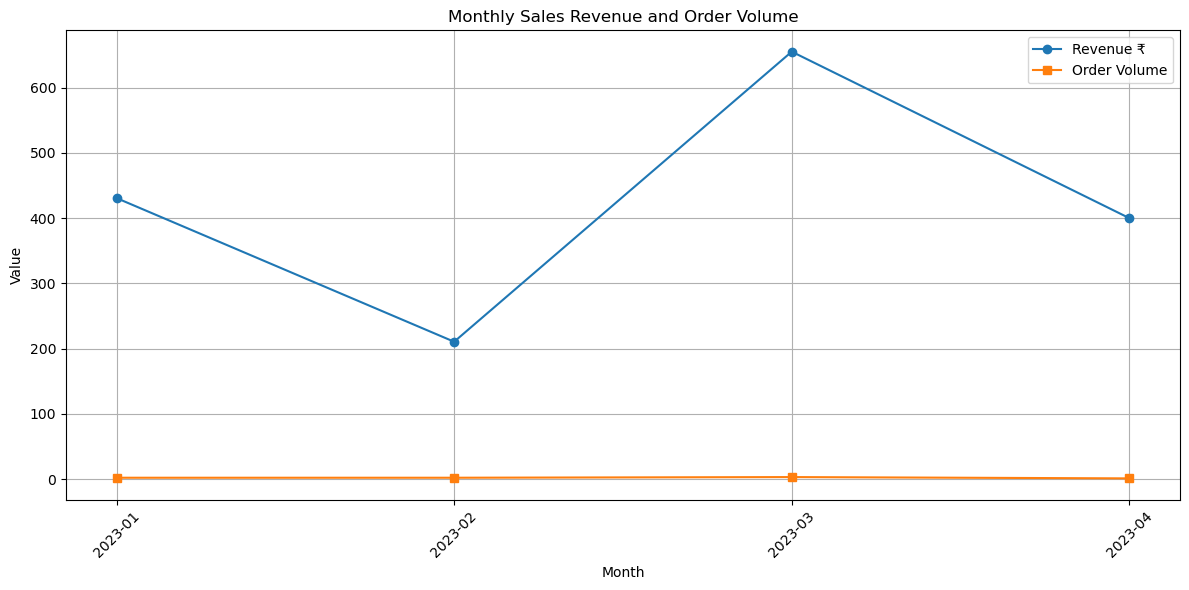

In [5]:
# Step 4: Plot trends using matplotlib

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot revenue
plt.plot(result_df['month'], result_df['total_revenue'], marker='o', label='Revenue ₹')

# Plot order volume
plt.plot(result_df['month'], result_df['total_orders'], marker='s', label='Order Volume')

# Labels and title
plt.title('Monthly Sales Revenue and Order Volume')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [6]:
# Step 5: Get top 3 months by revenue

top_3_revenue = result_df.sort_values(by='total_revenue', ascending=False).head(3)

print("🏆 Top 3 Months by Revenue:")
display(top_3_revenue)


🏆 Top 3 Months by Revenue:


,month,total_revenue,total_orders
2,2023-03,655.25,3
0,2023-01,430.75,2
3,2023-04,400.00,1
